In [106]:
# Importing the libraries
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import pickle
import os
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

In [107]:
pip install numpy pandas seaborn scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [108]:
SPLIT_METHOD = 'time'  # 'time' or 'random'
DATA_PATH = r"C:\Users\User\OneDrive\Desktop\INFOSYS\Data\EDA_WITH_VIF_DATA.csv"
OUTPUT_DIR = "."
df = pd.read_csv(DATA_PATH)

## Modeling

### LINEAR REGRESSION

#### 1. Importing necessary libraries

In [109]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import os
import joblib

#### 2. Splitting Train & Test dataset

In [110]:
# Creating a dependent variable for rented bike count
dependent_variable = 'cnt'

In [111]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['windspeed',
 'weekday',
 'season_4',
 'workingday',
 'weathersit',
 'yr',
 'season_2',
 'season_3',
 'mnth',
 'holiday',
 'temp']

In [112]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [113]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [114]:
X_train[0:10]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,season_2,season_3,season_4
97,-1.001369,4,0,5,1,2,-0.872222,0.471378,True,False,False
503,0.998633,5,0,5,1,1,0.376012,-0.692999,True,False,False
642,0.998633,10,0,4,1,2,0.886235,-0.941834,False,False,True
498,0.998633,5,0,0,0,1,0.640234,0.447167,True,False,False
303,-1.001369,10,0,1,1,1,-0.849442,-1.086402,False,False,True
570,0.998633,7,0,2,1,1,1.396458,0.270745,False,True,False
250,-1.001369,9,0,4,1,3,0.757292,0.029205,False,True,False
17,-1.001369,1,0,2,1,2,-1.523666,-0.564417,False,False,False
595,0.998633,8,0,6,0,1,1.000123,-0.162945,False,True,False
240,-1.001369,8,0,1,1,1,0.772347,-0.395910,False,True,False


In [115]:
# Transforming data 
scaler = MinMaxScaler()
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [116]:
# Your specific directory
save_dir = r"C:\Users\User\OneDrive\Desktop\INFOSYS\saved_models"

# Create folder if missing
os.makedirs(save_dir, exist_ok=True)

# Final file path
save_path = os.path.join(save_dir, "lr_scaler.pkl")

# Save scaler
with open(save_path, 'wb') as f:
    joblib.dump(scaler, f)

print(f"Scaler saved successfully at: {save_path}")


Scaler saved successfully at: C:\Users\User\OneDrive\Desktop\INFOSYS\saved_models\lr_scaler.pkl


In [117]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 11)
(584,)
(147, 11)
(147,)


In [119]:
X_train[0:10]

array([[0.        , 0.27272727, 0.        , 0.83333333, 1.        ,
        0.5       , 0.35024023, 0.48605788, 1.        , 0.        ,
        0.        ],
       [1.        , 0.36363636, 0.        , 0.83333333, 1.        ,
        0.        , 0.63925722, 0.24873701, 1.        , 0.        ,
        0.        ],
       [1.        , 0.81818182, 0.        , 0.66666667, 1.        ,
        0.5       , 0.75739478, 0.19801995, 0.        , 0.        ,
        1.        ],
       [1.        , 0.36363636, 0.        , 0.        , 0.        ,
        0.        , 0.7004354 , 0.48112329, 1.        , 0.        ,
        0.        ],
       [0.        , 0.81818182, 0.        , 0.16666667, 1.        ,
        0.        , 0.35551467, 0.16855453, 0.        , 0.        ,
        1.        ],
       [1.        , 0.54545455, 0.        , 0.33333333, 1.        ,
        0.        , 0.87553235, 0.44516526, 0.        , 1.        ,
        0.        ],
       [0.        , 0.72727273, 0.        , 0.66666667, 1.

#### 3. Model building with training & testing

In [120]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [121]:
import joblib
joblib.dump(regressor, r"C:\Users\User\OneDrive\Desktop\INFOSYS\saved_models\linear_regression.pkl")


['C:\\Users\\User\\OneDrive\\Desktop\\INFOSYS\\saved_models\\linear_regression.pkl']

In [122]:
# Cheeck coefficents
regressor.coef_

array([ 15.29868871,  -1.23866693,  -3.87010658,   3.01756277,
         0.95189132, -13.46518336,  32.70987169,  -8.56731923,
         9.1108743 ,   6.86903426,  12.76714928])

In [123]:
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

,Coefficient
yr,15.298689
mnth,-1.238667
holiday,-3.870107
weekday,3.017563
workingday,0.951891
weathersit,-13.465183
temp,32.709872
windspeed,-8.567319
season_2,9.110874
season_3,6.869034


In [124]:
# Check intercept
regressor.intercept_

np.float64(36.950710749664594)

In [125]:
# Checking score
regressor.score(X_train,y_train)

0.7972370239148932

In [126]:
# Y peredictions on train data
y_pred_train = regressor.predict(X_train)

# y predictions on test data
y_pred = regressor.predict(X_test)

#### Calculated values insights

Growth over time (yr ↑)

Warm weather boosts demand (temp ↑)

Wind & bad weather kill demand (weathersit, windspeed ↓)

Holidays slightly drop rentals

Working days bring consistent traffic


| **Term**     | **Represents**   | **Model Insight**                           |
| ------------ | ---------------- | ------------------------------------------- |
| `coef_`      | Feature weights  | Shows feature importance and direction.     |
| `intercept_` | Base value       | Predicted value when all features = 0.      |
| `score()`    | R²               | Fit quality (closer to 1 → better).         |
| `predict()`  | Model inference  | Produces predictions using learned weights. |
| `fit()`      | Training process | Finds optimal coefficients.                 |


#### 4. Model evaluation

In [127]:
import numpy as np
import pickle
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# ---------------------------------------------------
# 1) Calculate metrics + Print + Auto-store + Auto-save
# ---------------------------------------------------
def evaluate_and_store(model_name, y_true, y_pred, X_test, results_df, save_path="test_result.pkl"):
    # ---- Calculate Metrics ----
    MAE  = mean_absolute_error(y_true, y_pred)
    MSE  = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    R2   = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - R2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    # ---- Print like you wanted ----
    print(f"{model_name}: ['MAE': {round(MAE,3)}, 'MSE': {round(MSE,3)}, "
          f"'R2': {round(R2,3)}, 'RMSE': {round(RMSE,3)}, 'adj_r2': {round(adj_r2,3)}]")

    # ---- Prepare dictionary for storage ----
    metrics_dict = {
        "Model": model_name,
        "MAE": round(MAE, 4),
        "MSE": round(MSE, 4),
        "RMSE": round(RMSE, 4),
        "R2_score": round(R2, 4),
        "Adjusted_R2": round(adj_r2, 4)
    }

    # ---- Append only if model doesn't exist ----
    if model_name not in results_df["Model"].values:
        results_df = pd.concat([results_df, pd.DataFrame([metrics_dict])], ignore_index=True)
    else:
        print(f" Model '{model_name}' already exists. Skipping append.")

    # ---- Save updated dataframe ----
    with open(save_path, 'wb') as f:
        pickle.dump(results_df, f)

    print(f"✔ Results saved to {save_path}")

    return results_df


In [128]:
test_result_df = pd.DataFrame()


In [129]:
# Create empty results dataframe
results_df = pd.DataFrame(columns=["Model", "MSE", "RMSE", "MAE", "R2 Score"])

# Call function to evaluate results and save
test_result_df = evaluate_and_store(
    model_name="Linear Regression",
    y_true=y_test,
    y_pred=y_pred,
    X_test=X_test,
    results_df=results_df,
    save_path="test_result.pkl"
)

print(test_result_df)


Linear Regression: ['MAE': 4.837, 'MSE': 40.489, 'R2': 0.857, 'RMSE': 6.363, 'adj_r2': 0.846]
✔ Results saved to test_result.pkl
               Model      MSE    RMSE     MAE R2 Score  R2_score  Adjusted_R2
0  Linear Regression  40.4893  6.3631  4.8368      NaN    0.8575       0.8458


With an R² of 0.8575 and balanced train–test performance, the model shows strong predictive ability and minimal overfitting. Slight prediction errors indicate scope for further improvement through non-linear modeling.

### GENERAL INSIGHTS - model evaluation

| Metric                        | What it Says About Model            | What High/Low Means             |
| ----------------------------- | ----------------------------------- | ------------------------------- |
| **R²**                        | How much variance is explained      | High → good fit                 |
| **Adjusted R²**               | Fit adjusted for number of features | Close to R² → no junk features  |
| **MAE**                       | Average absolute prediction error   | Low → consistent accuracy       |
| **MSE / RMSE**                | Penalizes large prediction errors   | Low → stable + robust model     |
| **Gap between train/test R²** | Checks overfitting                  | Small gap → good generalization |


In [130]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [131]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [132]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

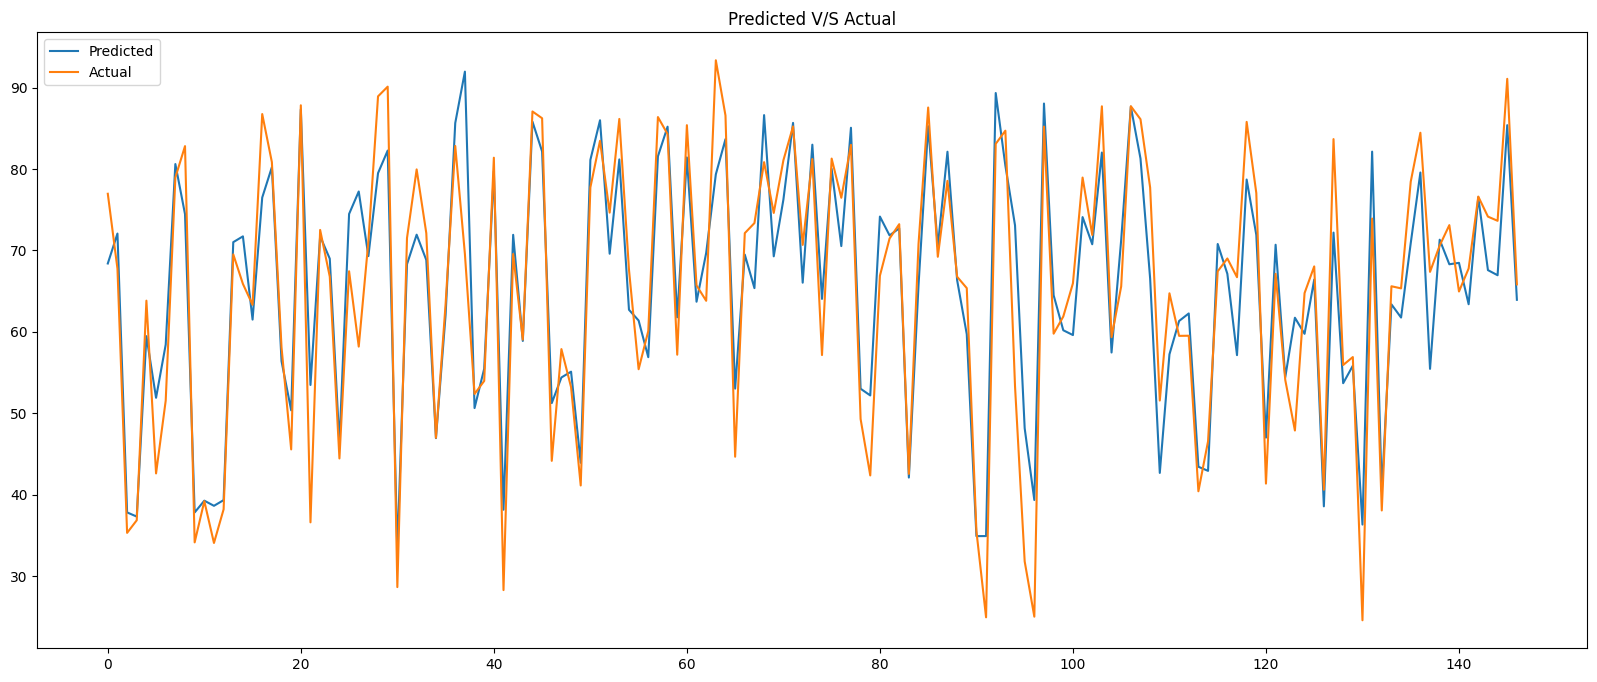

In [133]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

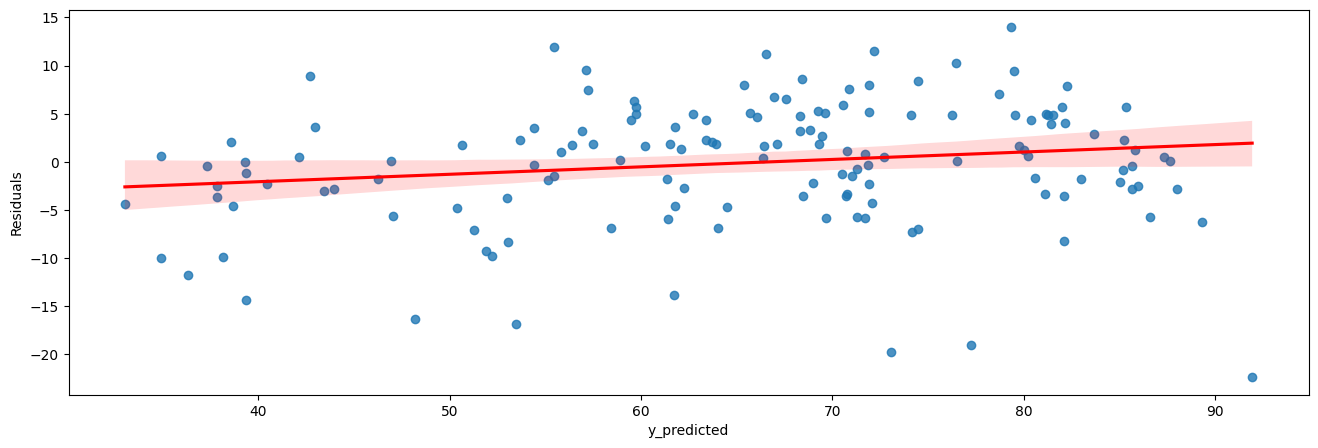

In [134]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred, y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

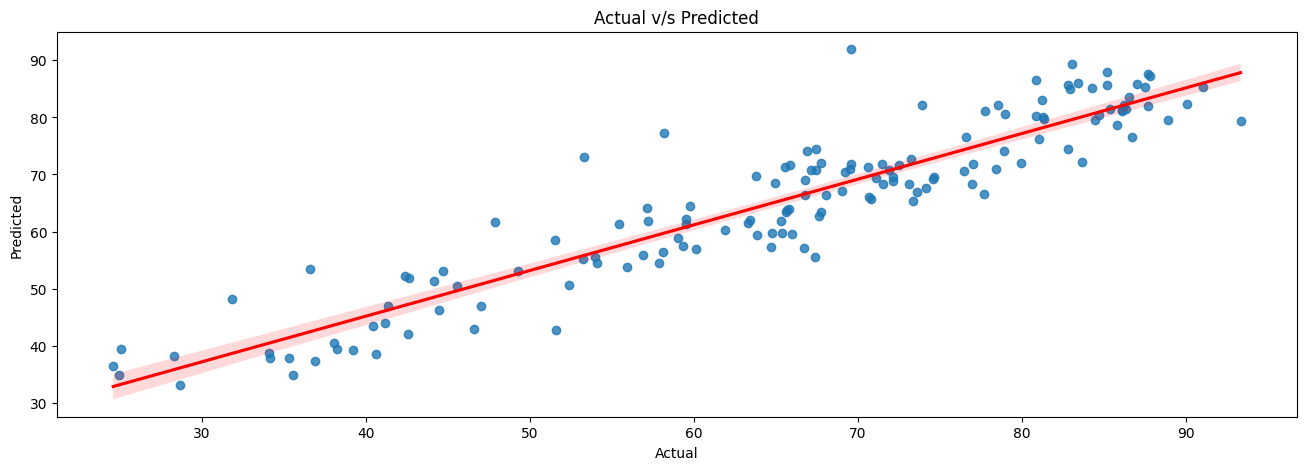

In [135]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

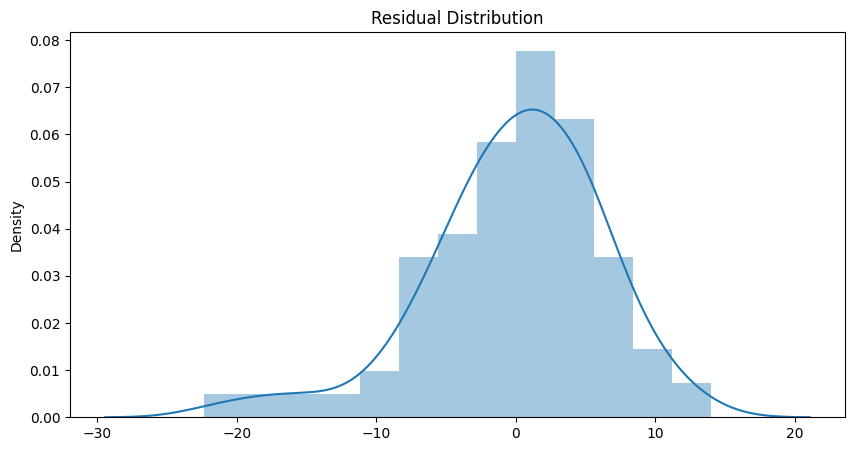

In [136]:
Residual_distPlot(y_pred,y_test)

The residuals form a near-normal distribution centered around zero, which indicates that the Linear Regression model is performing well — the errors are random, balanced, and not biased in any particular direction.

#### GENERAL INSIGHTS - plots after model evaluation

What are residuals?

Residuals = (Actual value − Predicted value)

They represent how far off your model’s predictions are for each data point.

If residual = 0 → perfect prediction

Negative residual → model overpredicted

Positive residual → model underpredicted